- Martin Navarrete Villegas
- 1343696
- FCFM - UANL


#### Classification algorithms

- Logistic regression
- Naive Bayes
- K-Nearest neighbor
- Decission Tree
- Random Forests
- Support Vector Machines
- Neural Network


#### Reading Pre-processing data

In [117]:
import pandas as pd
diabetesData = pd.read_csv("diabetes.csv")
diabetesData.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [118]:
diabetesData.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [119]:
diabetesData["Outcome"].sum()

268

In [120]:
diabetesData.shape

(768, 9)

In [121]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetesData[feature_cols] # Features
y = diabetesData.Outcome # Target variabl

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

#### 1. Logistic Regression

In [122]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

c:\Users\martin_navarrete\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
 # import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]], dtype=int64)

In [124]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8177083333333334


Text(0.5, 427.9555555555555, 'Predicted')

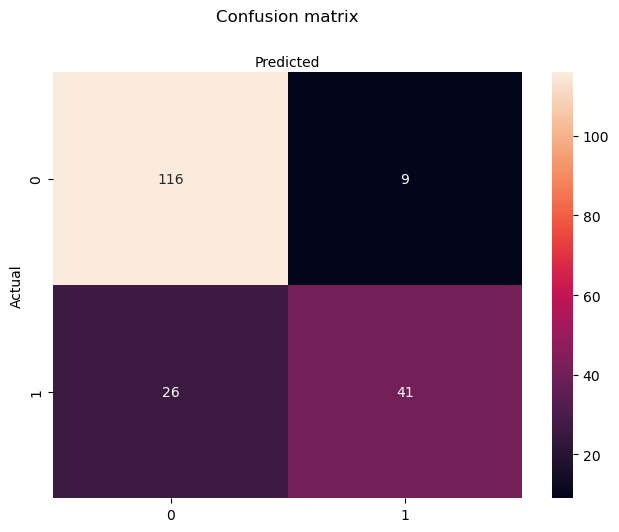

In [125]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [126]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



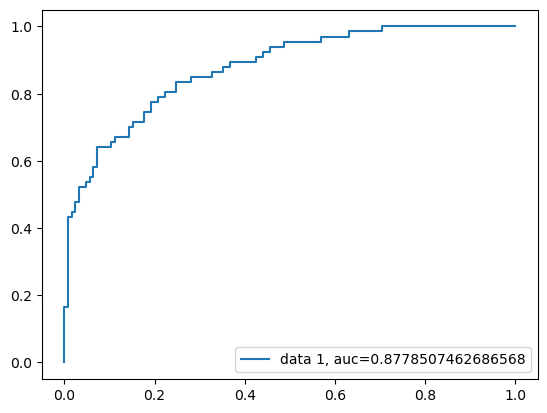

In [127]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


#### Native Bayes

In [128]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [129]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8177083333333334


In [130]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[112,  13],
       [ 22,  45]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

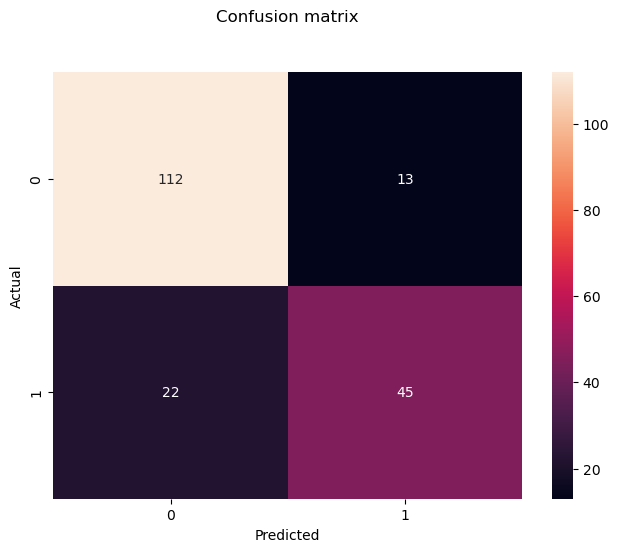

In [131]:
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [132]:
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.84      0.90      0.86       125
   with diabetes       0.78      0.67      0.72        67

        accuracy                           0.82       192
       macro avg       0.81      0.78      0.79       192
    weighted avg       0.81      0.82      0.81       192



#### Decission tree

In [133]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [134]:
#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7291666666666666


In [135]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[102,  23],
       [ 29,  38]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

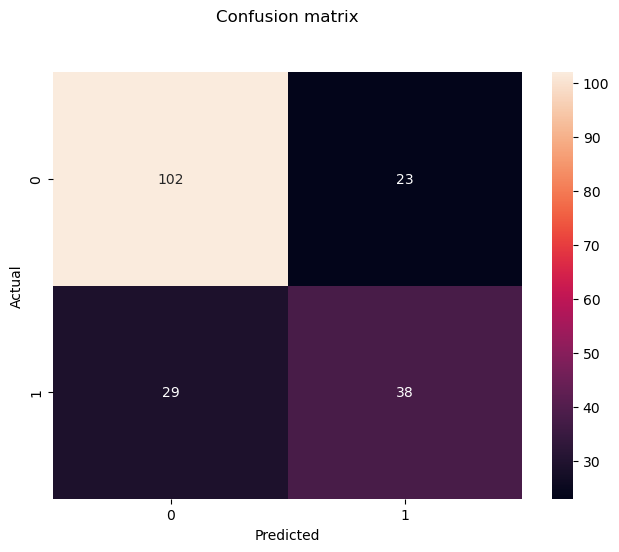

In [136]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [137]:
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.78      0.82      0.80       125
   with diabetes       0.62      0.57      0.59        67

        accuracy                           0.73       192
       macro avg       0.70      0.69      0.70       192
    weighted avg       0.72      0.73      0.73       192



#### Random Forests

In [138]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [139]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7916666666666666


In [140]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[113,  12],
       [ 28,  39]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

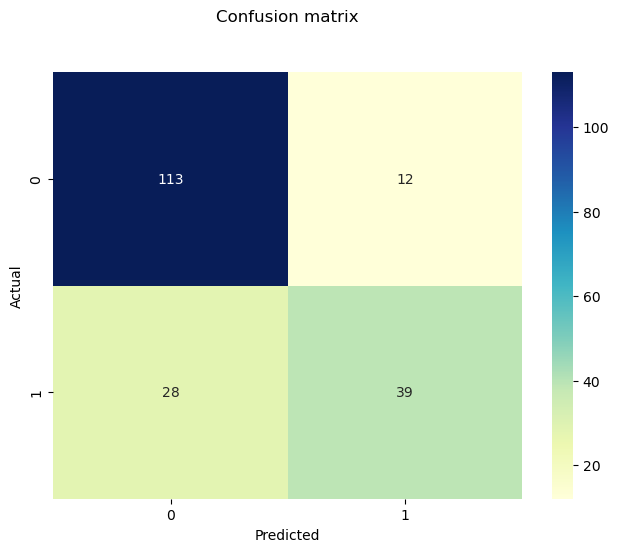

In [141]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [142]:
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.80      0.90      0.85       125
   with diabetes       0.76      0.58      0.66        67

        accuracy                           0.79       192
       macro avg       0.78      0.74      0.76       192
    weighted avg       0.79      0.79      0.78       192



#### Support Vector Machines

In [143]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
SV = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
SV.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = SV.predict(X_test)

In [144]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8177083333333334


In [145]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

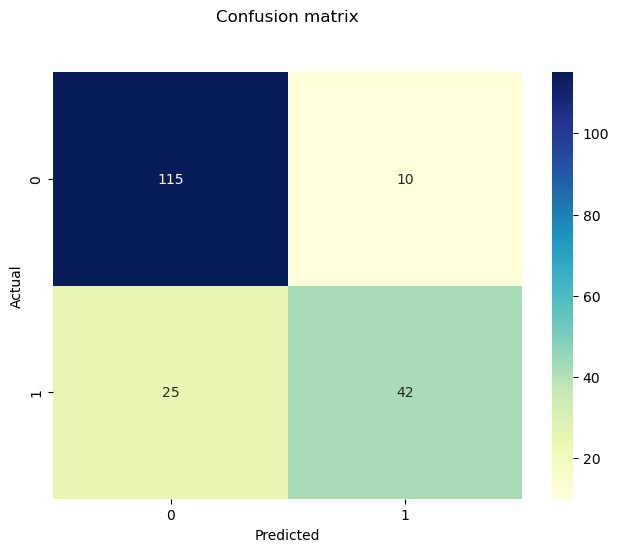

In [146]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [147]:
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



#### Neural Network

In [148]:
from sklearn.neural_network import MLPClassifier
NN= MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
NN.predict_proba(X_test[:1])
y_pred= NN.predict(X_test)

In [149]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7291666666666666


In [150]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[99, 26],
       [26, 41]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

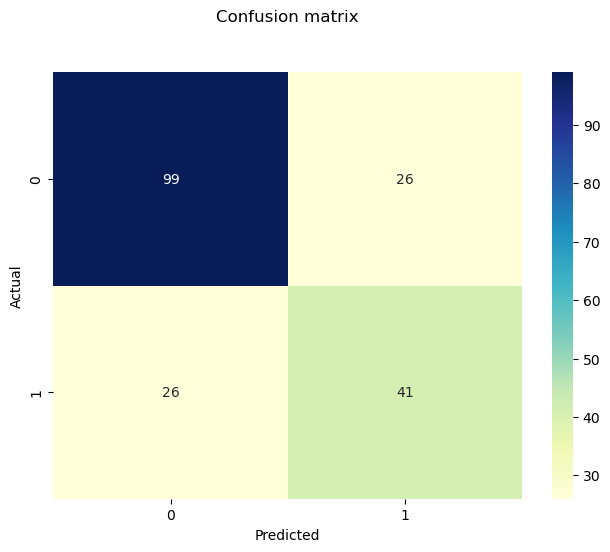

In [151]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [152]:
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.79      0.79       125
   with diabetes       0.61      0.61      0.61        67

        accuracy                           0.73       192
       macro avg       0.70      0.70      0.70       192
    weighted avg       0.73      0.73      0.73       192

